In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.special import iv
import matplotlib.pyplot as plt

def wt_gauss_(b,a,sigma):
    return (1 / (1 + (sigma / a)**2. )**2. ) * (2 - b**2. / (a**2. + sigma**2.)) * np.exp(-b**2. / (2 * (a**2. + sigma**2.))) / a

def intg_(x,b,a,s,g):
    if b * x / a**2. < 700:
        return ((1 - 1/g) / ( s**2. * a)) * np.exp(-(b**2. / (2 * a**2.))) *  x * (1 + (x**2. / (2 * s**2. * g )))**(-g) * ( (2 - b**2. / a**2. - x**2. / a**2. ) * iv(0, b * x / a**2.) + 2 * b * x / a**2. * iv(1, b * x / a**2.) ) * np.exp(-x**2. / (2 * a**2.))
    else:
        return ((1 - 1/g) / ( s**2. * a)) *  x * (1 + (x**2. / (2 * s**2. * g )))**(-g) * ( (2 - b**2. / a**2. - x**2. / a**2. ) * (1 + 1/8 * a**2. / b / x) + 2 * b * x / a**2. * (1 - 3/8 * a**2. / b / x) ) * np.exp(- (x - b)**2. / (2 * a**2.)) / np.sqrt(2 * np.pi * b * x / a**2.)

In [2]:
# integrate intg_ from 0 to inf using quad
def wt_king_int_(b,a,s,g):
    return quad(intg_, 0, np.inf, args=(b,a,s,g))[0]

# integrate intg_ from 0 to inf using quad
def wt_king_int_(b,a,s,g):
    return quad(lambda x: intg_(x,b,a,s,g), 0, np.inf)[0]

wt_king_int_vec_ = np.vectorize(wt_king_int_)

In [3]:
quad(lambda x: np.exp(x**2.) * np.exp(-2*x**2.), 0, np.inf)[0]

/tmp/ipykernel_266/1241229746.py:1: RuntimeWarning: overflow encountered in exp
  quad(lambda x: np.exp(x**2.) * np.exp(-2*x**2.), 0, np.inf)[0]
/tmp/ipykernel_266/1241229746.py:1: RuntimeWarning: invalid value encountered in double_scalars
  quad(lambda x: np.exp(x**2.) * np.exp(-2*x**2.), 0, np.inf)[0]
/tmp/ipykernel_266/1241229746.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad(lambda x: np.exp(x**2.) * np.exp(-2*x**2.), 0, np.inf)[0]


nan

In [4]:
iv(0, 100)

1.0737517071310736e+42

In [5]:
wt_king_int_(1,0.1,0.01,1000)

-2.954039116882158e-19

In [6]:
b = np.logspace(-2, 2, 1000)

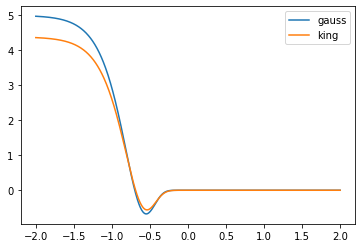

In [20]:
plt.plot(np.log10(b), wt_gauss_(b, 0.1, 0.1), label='gauss')
plt.plot(np.log10(b), wt_king_int_vec_(b, 0.1, 0.1, 10), label='king')
plt.legend()

Text(0, 0.5, '$w(b)$')

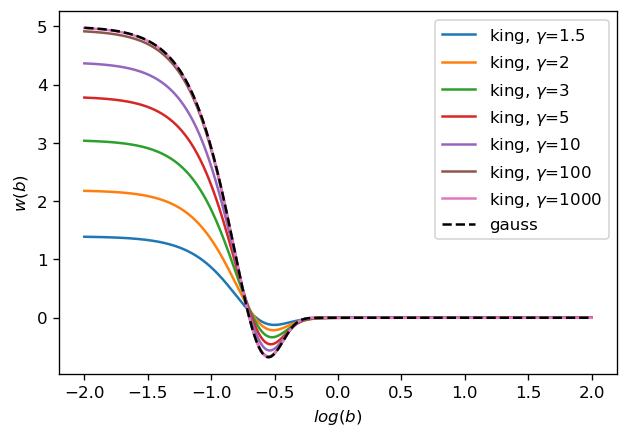

In [28]:
fig = plt.figure(figsize=(6, 4), dpi= 120)
ax = fig.add_subplot(111)

for g in [1.5, 2, 3, 5, 10, 100, 1000]:
    ax.plot(np.log10(b), wt_king_int_vec_(b, 0.1, 0.1, g), label='king, $\gamma$={}'.format(g))
ax.plot(np.log10(b), wt_gauss_(b, 0.1, 0.1), label='gauss', alpha = 1, c = 'k', ls = '--')
# ax.plot(np.log10(b), wt_king_int_vec_(b, 0.1, 0.1, 10), label='king')

ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend()
ax.set_xlabel('$log(b)$')
ax.set_ylabel('$w(b)$')

In [8]:
wt_king_int_(10**-0.7, 0.01, 0.1, 10)

-0.0019813428778299213